In [54]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn.metrics as metrics

In [2]:
telcomData = pd.read_csv("/Users/psingh02/Desktop/Big Data Analytics/Semester 2/Enterprise Analytics/ea_data.csv")

In [3]:
telcomData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for index in telcomData.columns:   
    if (index == "customerID" or index == "tenure" or index == "MonthlyCharges" or index == "TotalCharges"):
        pass
    else: 
        le.fit(telcomData[index])
        telcomData[index+"Indexed"] = le.transform(telcomData[index])

/var/folders/73/mh8wnr3x3ps07jk6kk9cpp4r0000gp/T/ipykernel_47087/1195258857.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(telcomData.corr())


<AxesSubplot: >

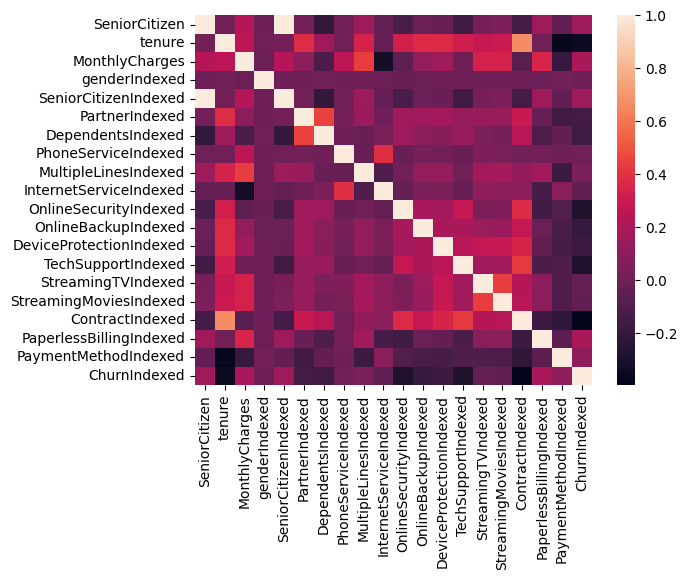

In [37]:
sns.heatmap(telcomData.corr())

Contract, Tech support, online security, tenure show no correlation

In [39]:
from sklearn.model_selection import train_test_split

In [44]:
x = telcomData.loc[:,["SeniorCitizen","MonthlyCharges","genderIndexed","SeniorCitizenIndexed","PhoneServiceIndexed","MultipleLinesIndexed","InternetServiceIndexed", "StreamingTVIndexed", "StreamingMoviesIndexed", "PaperlessBillingIndexed", "PaymentMethodIndexed"]]
y = telcomData["ChurnIndexed"]

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(x_train,y_train)
rfc_prediction = rfc.predict(x_test)
print("-----------------------------------------------------------")
print(classification_report(y_test, rfc_prediction))
print(metrics.accuracy_score(y_test, rfc_prediction))

-----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1574
           1       0.44      0.41      0.42       539

    accuracy                           0.72      2113
   macro avg       0.62      0.62      0.62      2113
weighted avg       0.71      0.72      0.71      2113

0.7174633222905821


In [56]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train,y_train)
nb_prediction = nb.predict(x_test)
print("-----------------------------------------------------------")
print(classification_report(y_test, nb_prediction))
print(metrics.accuracy_score(y_test, nb_prediction))

-----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      1574
           1       0.40      0.13      0.19       539

    accuracy                           0.73      2113
   macro avg       0.58      0.53      0.51      2113
weighted avg       0.67      0.73      0.67      2113

0.7283483199242783
